# 数量化Ⅰ類

カテゴリ変数を説明変数として、他の変数への影響を調べる。<br>
\>>> one-hot本数を用いた重回帰分析

カテゴリを数値で表すことができる<br>
\>>> 数量化

In [1]:
# import library
import zipfile
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Import data

In [2]:
!pip3 install kaggle

In [3]:
# download data form kaggle
!kaggle datasets download hellbuoy/car-price-prediction

/Users/uu245453/Documents/training/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
  0%|                                               | 0.00/18.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 18.1k/18.1k [00:00<00:00, 7.64MB/s]


In [4]:
# unzip
shutil.unpack_archive('car-price-prediction.zip', 'car-price-prediction')

In [5]:
df = pd.read_csv("./car-price-prediction/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Preprocessing

In [9]:
df.drop('car_ID' , axis=1, inplace=True)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [10]:
X = pd.get_dummies(X, dummy_na=True, dtype='uint8') # カテゴリーデータをダミーデータに変換 
X = X.fillna(X.median()) # 数量データの欠損値を中央値で置換
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_nan,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fuelsystem_nan
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,1,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,1,0,0,0


<br>

**データの差がない変数は予測に使用できないため、分散が0の列を取り除く**

In [11]:
# 分散が0の列を取り除く
X = X.iloc[:, [i for i, x in enumerate(X.var()) if x != 0]]
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


<br>

**変数のサンプルが1のものはそれだけでyの特徴を表しているため、予測には使用できない**

In [12]:
# サンプル数が1のカテゴリーデータを取り除く
X = X.iloc[:, [i for i, x in enumerate(X.sum()) if x != 1]]
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,0,1,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,0,1,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,1,0,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,1,0,0,0,0,0,0,0,1,0


In [13]:
# エラーを起こす行を除外

safe = [] # モデルが正常に動作する行
drop_list = [] # エラーを起こす行

for i in range(len(X)): # len(X)= 行の長さ
    try:
        clf = linear_model.LinearRegression() # 重回帰分析
        clf.fit(X.iloc[safe + [i], :], Y.iloc[safe + [i]])
        safe.append(i)
    except:
        drop_list.append(i)

In [14]:
X = X.iloc[safe, :]
Y = Y.iloc[safe]

## The first type of quantification method v.1

In [15]:
result_scores = []

for _ in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    clf = linear_model.LinearRegression()
    clf.fit(X_train, Y_train)
    result_scores.append(clf.score(X_test, Y_test))
print('{0:.4f} ± {1:.4f}'.format(np.mean(result_scores), np.std(result_scores)))

0.7448 ± 0.1773


In [16]:
# 回帰係数を調べて目的変数への影響をみる
clf = linear_model.LinearRegression()
clf.fit(X, Y)
coefs = pd.DataFrame(clf.coef_, index=X.columns).sort_values(0, ascending=False)
coefs # 回帰係数を大きい順に並べたもの

,0
enginetype_ohc,11315.356469
enginetype_ohcf,10663.777555
enginetype_dohc,8009.131454
enginetype_l,8005.556567
cylindernumber_two,6642.288692
...,...
stroke,-3398.583052
cylindernumber_five,-3910.836133
fueltype_gas,-3925.082932
CarName_toyota starlet,-4491.392867


<br>

**説明変数はダミー変数に変更したため、カラム数が元の説明変数のユニーク分になり解釈が複雑になる**<br>
\>>> **解釈を用意にするため、元のカテゴリデータの列にまとめる**

In [17]:
# 同じカテゴリカルデータ由来の列をまとめる
col_group = {}
for col in X.columns:
    a = col.split("_") # 元の説明変数_ユニーク名を"_"で分割
    if len(a) == 2: # ["元の説明変数", "ユニーク名"]
        if a[0] not in col_group.keys():
            col_group[a[0]] = []
        col_group[a[0]].append(a[1])
    else:
        col_group[col] = [col]

#　まとめた列の出力
for k, v in col_group.items():
    print(k,":", v)

symboling : ['symboling']
wheelbase : ['wheelbase']
carlength : ['carlength']
carwidth : ['carwidth']
carheight : ['carheight']
curbweight : ['curbweight']
enginesize : ['enginesize']
boreratio : ['boreratio']
stroke : ['stroke']
compressionratio : ['compressionratio']
horsepower : ['horsepower']
peakrpm : ['peakrpm']
citympg : ['citympg']
highwaympg : ['highwaympg']
CarName : ['audi 100ls', 'bmw 320i', 'bmw x3', 'honda accord', 'honda civic', 'honda civic cvcc', 'isuzu D-Max ', 'mazda 626', 'mazda glc', 'mazda glc deluxe', 'mazda rx-4', 'mazda rx-7 gs', 'mitsubishi g4', 'mitsubishi mirage g4', 'mitsubishi outlander', 'nissan clipper', 'nissan latio', 'nissan rogue', 'peugeot 504', 'peugeot 604sl', 'plymouth fury iii', 'porsche cayenne', 'saab 99e', 'saab 99gle', 'saab 99le', 'subaru', 'subaru dl', 'toyota corolla', 'toyota corolla 1200', 'toyota corolla liftback', 'toyota corona', 'toyota mark ii', 'toyota starlet', 'volkswagen dasher', 'volvo 144ea', 'volvo 145e (sw)', 'volvo 244dl',

In [18]:
# 同じ列の回帰係数をまとめる
names = []
values = []
for k,v in col_group.items():
    if len(v) == 1:
        coef = coefs.loc[k][0]
        names.append(k)
        values.append([coef])
    else:
        names.append(k)
        ary = []
        for val in v:
            coef = coefs.loc["{}_{}".format(k,val)][0]
            ary.append(coef)
        values.append(ary)

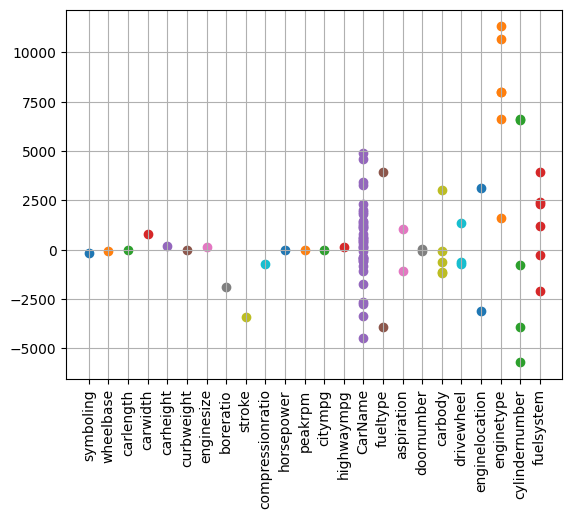

In [19]:
# 回帰係数を元の同じ列をx軸に置いて比較
for i, y in enumerate(values):
    plt.scatter([i for _ in y], y)
plt.xticks([j for j in range(len(names))], names, rotation=90)
plt.grid()
plt.show()

**カテゴリ変数は0or1のため回帰係数の絶対値が大きい傾向がある**

以下の2点に当てはまるカラムはモデルの説明するのに情報が少ない（もしくは精度を悪くする）ので除外する
- 相関係数が 0 に近い説明変数は、価格にはあまり影響しない要因である。
- 相関係数の正負と、回帰係数の正負が一致しているものが、価格への影響が説明できる要因である。正負が逆転している場合は、価格への影響が（少なくとも線形関係としては）説明できない。

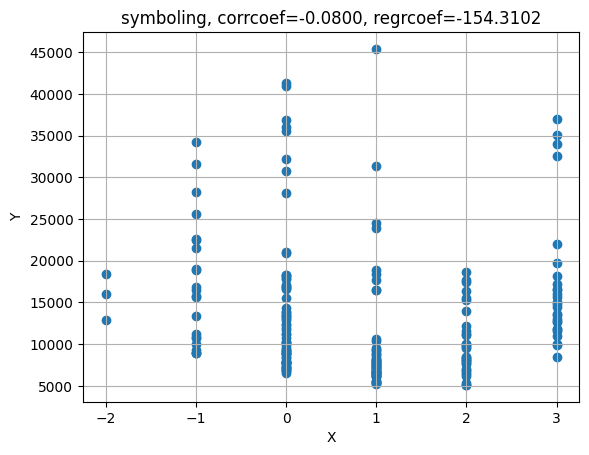

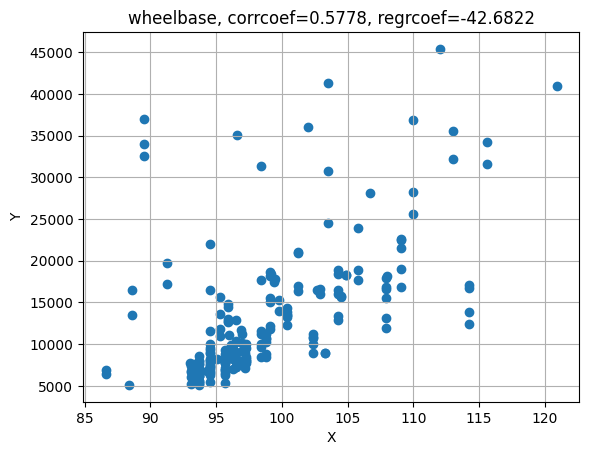

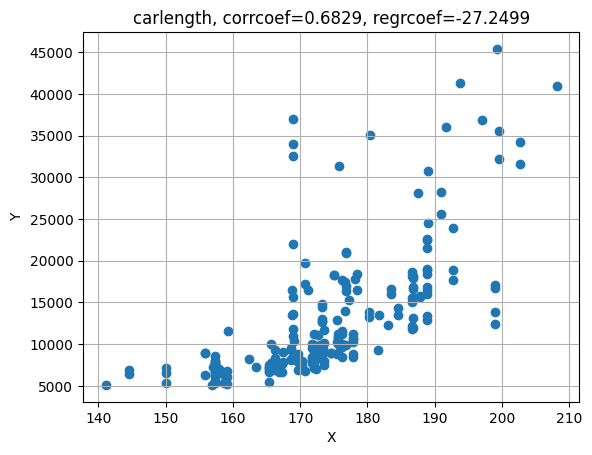

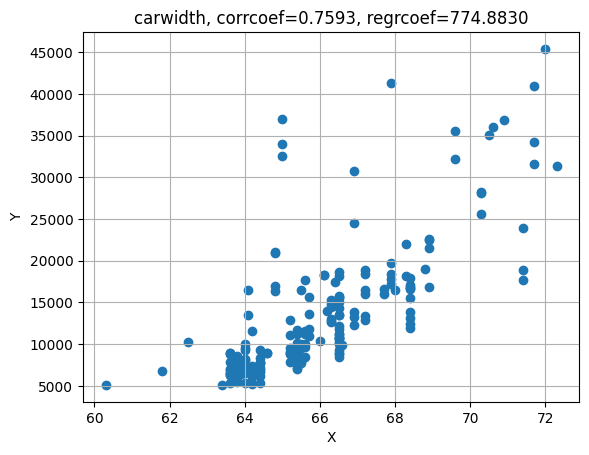

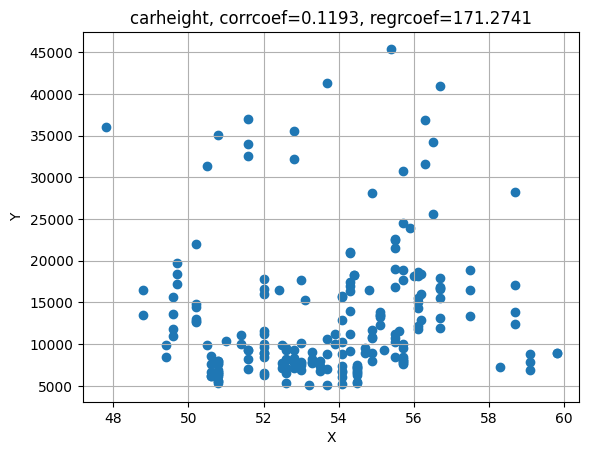

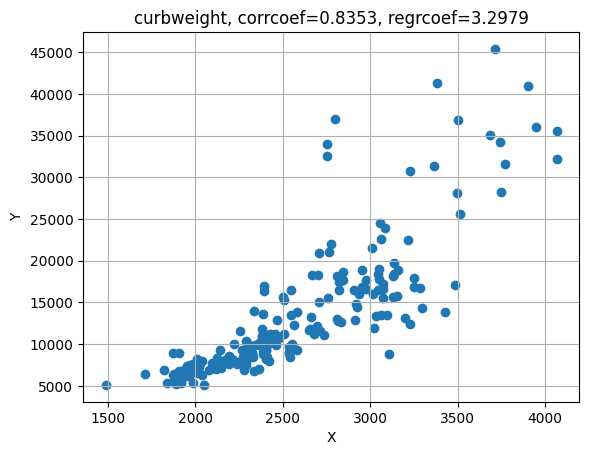

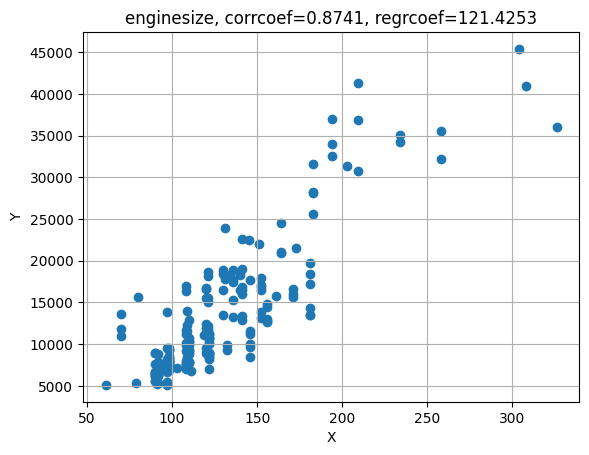

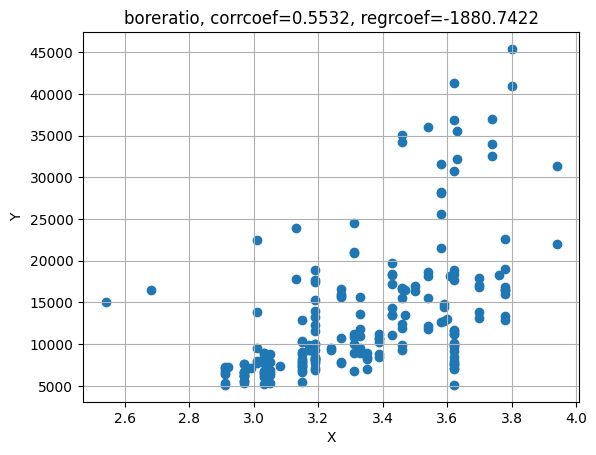

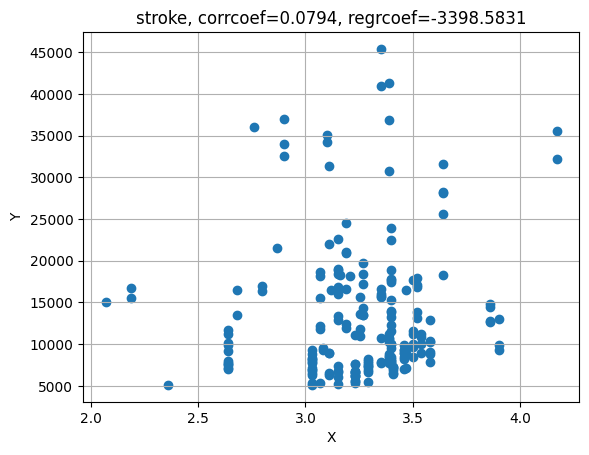

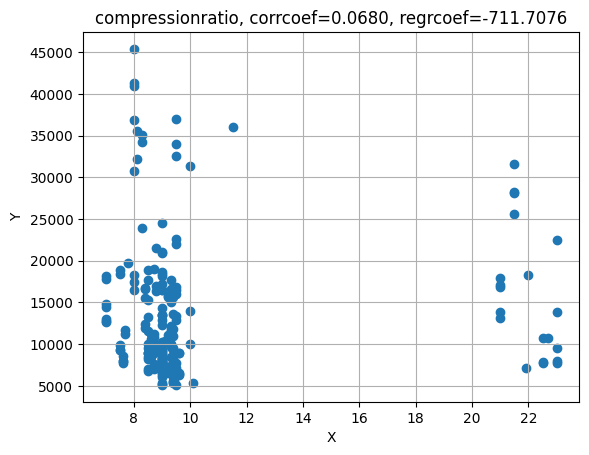

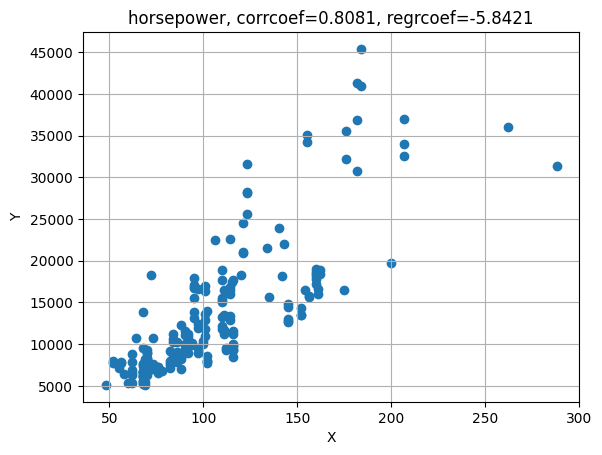

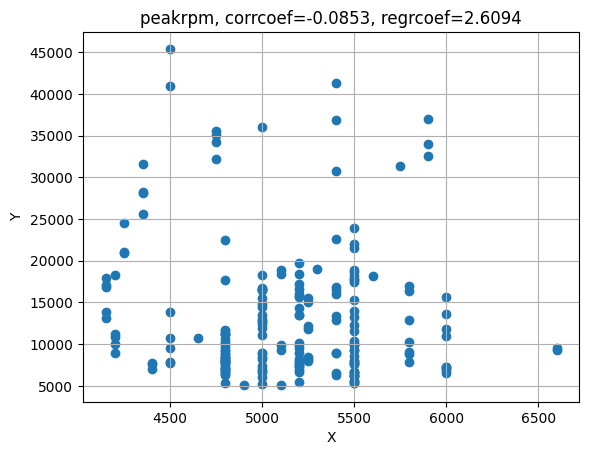

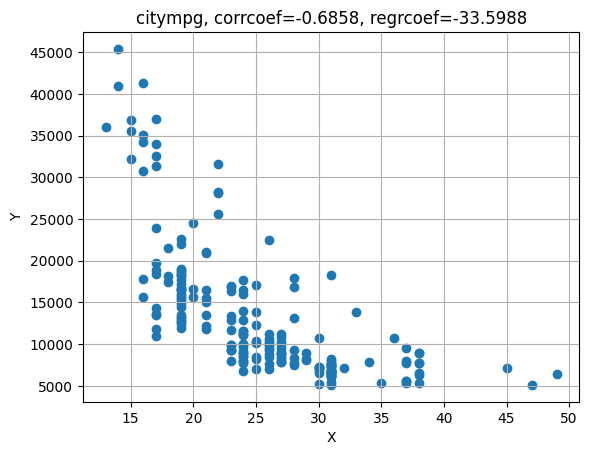

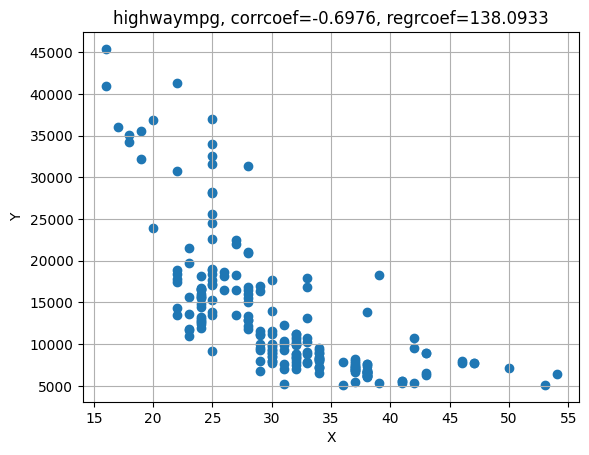

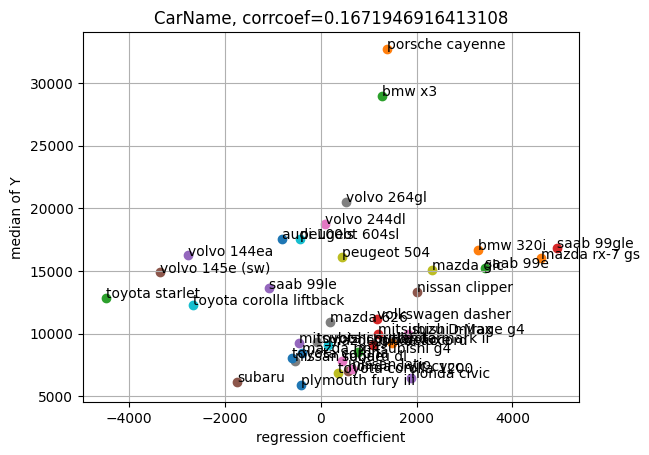

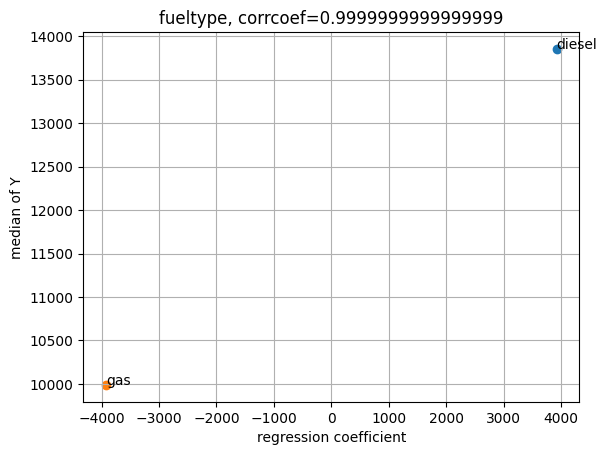

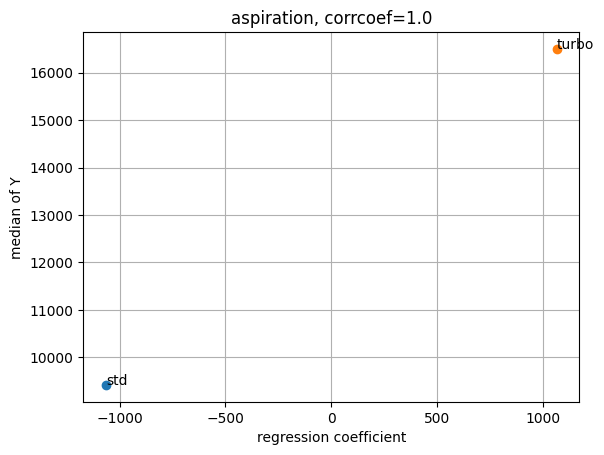

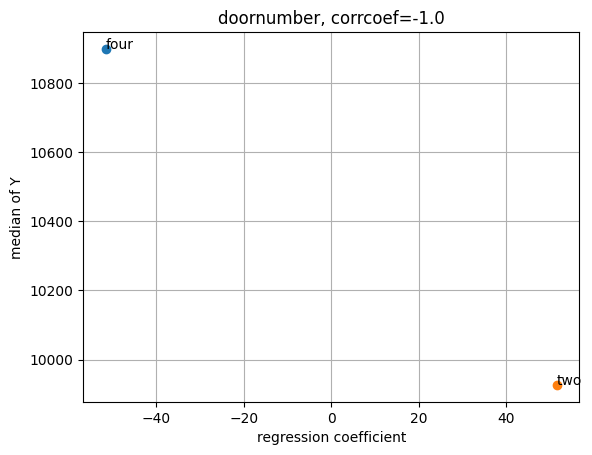

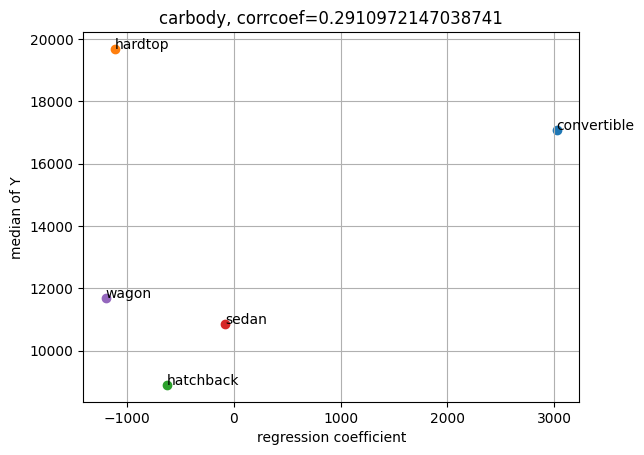

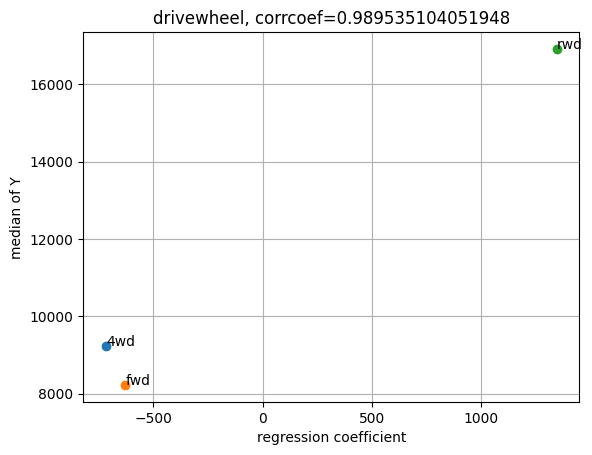

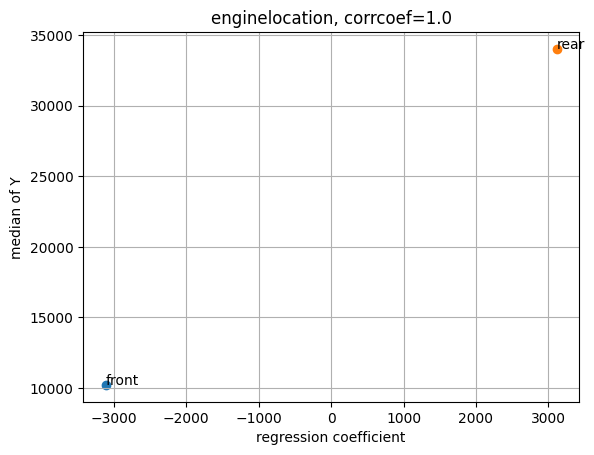

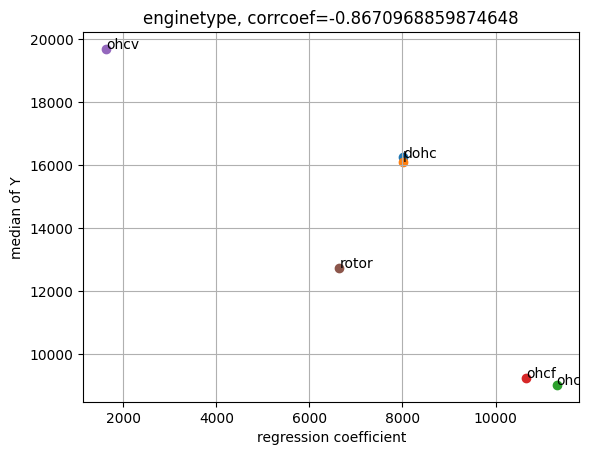

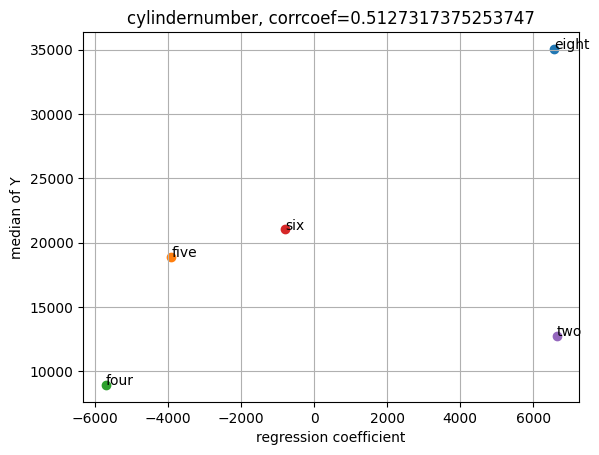

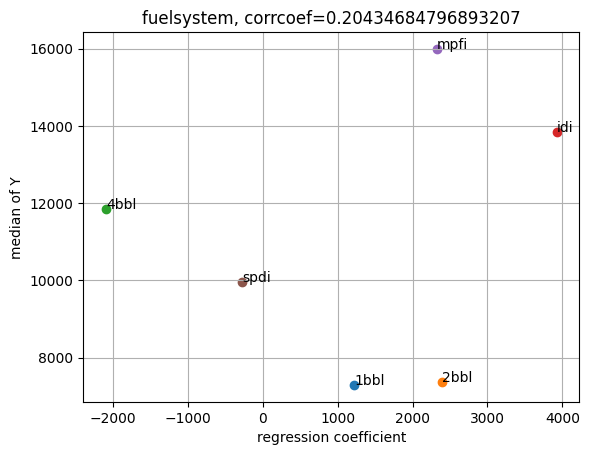

In [20]:
#目的変数に対して影響力のあるカラムをリストアップ

meaningful_cols = [] # 回帰係数と目的変数の相関係数の絶対値が0.5以上のものを目的変数に対して影響力のあるカラムとして定義
for k,v in col_group.items():
    if len(v) != 1: # ダミー変数（カテゴリカル変数）
        x_axis = []
        y_axis = []
        xy_names = []
        for val in v:
            try:
                x_axis.append(coefs.loc["{}_{}".format(k,val)][0])
                y_axis.append(Y[X["{}_{}".format(k,val)] == 1].median()) # ダミー変数が1の時の目的変数Y（price）の中央値
                xy_names.append(val)
            except:
                continue

        corrcoef = np.corrcoef(x_axis, y_axis)[0][1] # 回帰係数と目的変数の相関係数
        plt.title("{}, corrcoef={}".format(k, corrcoef))
        for x, y, name in zip(x_axis, y_axis, xy_names):
            plt.scatter(x, y)
            plt.text(x, y, name)
        plt.xlabel("regression coefficient")
        plt.ylabel("median of Y")
        plt.grid()
        plt.show()

        if abs(np.corrcoef(x_axis, y_axis)[0][1]) >= 0.5:
            meaningful_cols.append(k)
    else:
        corrcoef = np.corrcoef(X[k].values, Y.values)[0][1] # 回帰係数と目的変数の相関係数
        regrcoef = coefs.loc[k][0]                          # 回帰係数
        plt.title("{0}, corrcoef={1:.4f}, regrcoef={2:.4f}".format(k, corrcoef, regrcoef))
        plt.scatter(X[k].values, Y.values)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid()
        plt.show()
        if corrcoef * regrcoef > 0: # 回帰係数と相関係数の正負が一致しているかの判定
            if abs(np.corrcoef(X[k].values, Y.values)[0][1]) >= 0.5:
                meaningful_cols.append(k)

In [21]:
meaningful_cols

['carwidth',
 'curbweight',
 'enginesize',
 'citympg',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber']

## The first type of quantification method of v.2
**v.1の結果から得た回帰係数と目的変数の相関関係が大きいカラムで再びmodelを作成**

In [22]:
X = df[meaningful_cols]
X = pd.get_dummies(X, dummy_na=True, dtype='uint8')
X = X.fillna(X.median())
X = X.iloc[:, [i for i, x in enumerate(X.var()) if x != 0]]
X = X.iloc[:, [i for i, x in enumerate(X.sum()) if x != 1]]
Y = df.iloc[:, -1]

In [23]:
from sklearn import linear_model
safe = []
droplist = []
for i in range(len(X)):
    try:
        clf = linear_model.LinearRegression()
        clf.fit(X.iloc[safe + [i], :], Y.iloc[safe + [i]])
        safe.append(i)
    except:
        droplist.append(i)

In [24]:
from sklearn.model_selection import train_test_split
result_scores = []
for _ in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    clf = linear_model.LinearRegression()
    clf.fit(X_train, Y_train)
    result_scores.append(clf.score(X_test, Y_test))
print('{0:.4f} ± {1:.4f}'.format(np.mean(result_scores), np.std(result_scores)))

0.8618 ± 0.0387


In [25]:
X_std = X.apply(lambda x: (x-x.mean())/x.std(), axis=0) # 説明変数の標準化
X_std.head()

,carwidth,curbweight,enginesize,citympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two
0,-0.842719,-0.014531,0.074267,-0.644974,-0.327995,0.327995,0.468149,-0.468149,-1.127628,1.127628,...,-0.248743,-1.607428,-0.28029,-0.259573,-0.140725,-0.157728,-0.237538,0.536560,-0.363249,-0.140725
1,-0.842719,-0.014531,0.074267,-0.644974,-0.327995,0.327995,0.468149,-0.468149,-1.127628,1.127628,...,-0.248743,-1.607428,-0.28029,-0.259573,-0.140725,-0.157728,-0.237538,0.536560,-0.363249,-0.140725
2,-0.190101,0.513625,0.602571,-0.950684,-0.327995,0.327995,0.468149,-0.468149,-1.127628,1.127628,...,-0.248743,-1.607428,-0.28029,3.833691,-0.140725,-0.157728,-0.237538,-1.854632,2.739503,-0.140725
3,0.136209,-0.419770,-0.430023,-0.186409,-0.327995,0.327995,0.468149,-0.468149,0.882491,-0.882491,...,-0.248743,0.619077,-0.28029,-0.259573,-0.140725,-0.157728,-0.237538,0.536560,-0.363249,-0.140725
4,0.229440,0.515545,0.218350,-1.103540,-0.327995,0.327995,0.468149,-0.468149,0.882491,-0.882491,...,-0.248743,0.619077,-0.28029,-0.259573,-0.140725,-0.157728,4.189312,-1.854632,-0.363249,-0.140725


In [26]:
Y_std = [(y - Y.mean())/Y.std() for y in Y] # 目的変数の標準化

In [27]:
clf = linear_model.LinearRegression()
clf.fit(X_std, Y_std)
coefs = pd.DataFrame(clf.coef_, index=X_std.columns).sort_values(0, ascending=False)
coefs # 回帰係数を大きい順に並べたもの

,0
enginetype_ohc,0.574609
enginetype_ohcf,0.307941
enginesize,0.256423
enginetype_dohc,0.252706
curbweight,0.217914
enginetype_l,0.196272
carwidth,0.189288
cylindernumber_eight,0.126839
enginetype_ohcv,0.100599
enginelocation_rear,0.094210


In [28]:
col_group = {}
for col in X_std.columns:
    a = col.split("_")
    if len(a) == 2:
        if a[0] not in col_group.keys():
            col_group[a[0]] = []
        col_group[a[0]].append(a[1])
    else:
        col_group[col] = [col]

In [29]:
names = []
values = []
for k,v in col_group.items():
    if len(v) == 1:
        coef = coefs.loc[k][0]
        names.append(k)
        values.append([coef])
    else:
        names.append(k)
        ary = []
        for val in v:
            coef = coefs.loc["{}_{}".format(k,val)][0]
            ary.append(coef)
        values.append(ary)

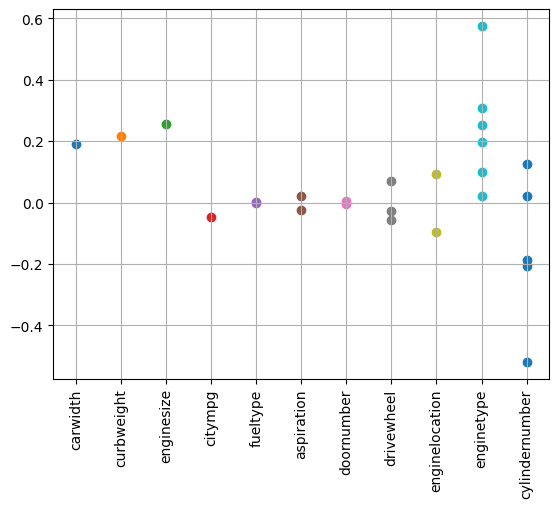

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

for i, y in enumerate(values):
    plt.scatter([i for _ in y], y)
plt.xticks([i for i in range(len(names))], names, rotation=90)
plt.grid()
plt.show()